In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Analyzing appended data
Datasets:
- THE World University Rankings 2016-2025 - Main Dataset
- GDP By Country, in current US$ 1988-2022 - GDP
- Quality of Life (NUMBEO) - Quality of Life
- Corruption Perceptions Index Rank - Corruption Perceptions Index
- Population Growth - Population
- CO₂ emissions - CO2 Emissions

Added columns:
- Population
- CO2
- GDP
- Corruption [0 - 100] (bad - good)
- HDI [0 - 1] (bad - good)
- GII [0 - 1] (good - bad)

Overall Score calculation:
Teaching - 29.5 %
Research Environment - 29 %
Research Quality - 30 %
International Outlook - 7.5 %
Industry - 4 %

Meaning of features (https://www.timeshighereducation.com/student/news/how-use-rankings-frequently-asked-questions):

Teaching (the learning environment) is a measure of the learning experience and quality at a university. It is based on the reputation among academics, and statistics about staff, students and research.

Research environment is a measure of both the quality and quantity of research output, based on reputation, research income and productivity.

Research Quality measures how influential that research is, and counts the number of times work published by academics at the university is cited in other papers.

International Outlook measures the environment and attitude with respect to international students, staff and research. It is based on international-to-domestic ratios across staff, students and research collaborations.

Industry is a measure of innovation at a university, based on how much the university earns from its inventions and industrial work.

In [73]:
df = pd.read_csv("df_extended.csv", index_col=0)
df.shape
df = df.dropna()
df.shape

(6959, 20)

In [51]:
df['International Students'] = (
    df['International Students']
    .str.rstrip('%')           # Remove '%' symbol
    .replace('', '0')          # Replace empty strings with '0'
    .replace('N/A', 'N/A')       # Replace non-numeric entries like 'N/A' with '0'
)

df['International Students'] = df['International Students'].astype(float)

def convert_ratio(value):
    try:
        # Handle "x : y" or "x:y" formats
        if ':' in value:
            parts = value.split(':')  # Split by colon
            # Extract first two numeric parts (ignoring extras like ':00')
            num1, num2 = float(parts[0]), float(parts[1])
            return num1 / num2
        else:
            # If it's already a float (or valid number), convert and return
            return float(value)
    except:
        # Handle invalid or missing values
        return None  # Or use a default value like 0

# Apply the conversion function
df['Female to Male Ratio'] = df['Female to Male Ratio'].apply(convert_ratio)

In [52]:
df = df[df['Year'] != 2025]
df = df[df['Year'] != 2024]
df.shape
df

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Population,CO2,Corruption,GDP,HDI,GII
0,1.0,California Institute of Technology,United States,2243.0,6.9,26.0,0.492537,95.2000,95.6,97.6,99.8,97.8,64.0,2016,329179421.0,15.957657,74.0,1.869511e+13,0.926,0.214
1,2.0,University of Oxford,United Kingdom,19920.0,11.6,34.0,0.851852,94.2000,86.5,98.9,98.8,73.1,94.4,2016,65893359.0,6.061766,81.0,2.699660e+12,0.926,0.125
2,3.0,Stanford University,United States,15596.0,7.8,22.0,0.724138,93.9000,92.5,96.2,99.9,63.3,76.3,2016,329179421.0,15.957657,74.0,1.869511e+13,0.926,0.214
3,4.0,University of Cambridge,United Kingdom,18810.0,11.8,34.0,0.851852,92.8000,88.2,96.7,97.0,55.0,91.5,2016,65893359.0,6.061766,81.0,2.699660e+12,0.926,0.125
4,5.0,Massachusetts Institute of Technology,United States,11074.0,9.0,33.0,0.587302,92.0000,89.4,88.6,99.7,95.4,84.0,2016,329179421.0,15.957657,74.0,1.869511e+13,0.926,0.214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10521,1795.0,Ovidius University of Constanța,Romania,18344.0,12.7,6.0,0.886792,11.0500,16.2,8.6,3.1,37.0,23.4,2023,19118481.0,3.569294,46.0,NaN,NaN,NaN
10522,1796.0,Ivanovo State University of Chemistry and Tech...,Russian Federation,3788.0,18.5,6.0,0.818182,10.8000,16.6,10.0,0.8,36.9,22.1,2023,NaN,NaN,26.0,NaN,NaN,NaN
10523,1797.0,Yuri Gagarin State Technical University of Sar...,Russian Federation,28280.0,34.1,1.0,0.724138,10.7700,12.5,8.9,7.2,37.5,16.7,2023,NaN,NaN,26.0,NaN,NaN,NaN
10524,1798.0,Universidade Federal do Vale do São Francisco,Brazil,6395.0,11.0,0.0,0.960784,10.6500,16.6,7.4,4.1,36.9,17.3,2023,211140731.0,2.304009,36.0,NaN,NaN,NaN


In [53]:
min_gdp = df['GDP'].min()
max_gdp = df['GDP'].max()

print("Minimum GDP:", min_gdp)
print("Maximum GDP:", max_gdp)

Minimum GDP: 4769995511.55242
Maximum GDP: 25462700000000.0


In [54]:
df_grouped = df.drop(columns=['Year', 'Country']).groupby('Name').mean().reset_index()

In [55]:
df_grouped.columns

Index(['Name', 'Rank', 'Student Population', 'Students to Staff Ratio',
       'International Students', 'Female to Male Ratio', 'Overall Score',
       'Teaching', 'Research Environment', 'Research Quality',
       'Industry Impact', 'International Outlook', 'Population', 'CO2',
       'Corruption', 'GDP', 'HDI', 'GII'],
      dtype='object')

In [56]:
correlations = df_grouped.drop(columns=['Name']).corr()
correlations['Rank'].sort_values(ascending=True)

Overall Score             -0.915143
Research Quality          -0.871043
Research Environment      -0.722058
Teaching                  -0.677954
International Outlook     -0.618513
Corruption                -0.569081
International Students    -0.507955
HDI                       -0.438512
Industry Impact           -0.380490
CO2                       -0.351298
GDP                       -0.255917
Female to Male Ratio       0.013997
Students to Staff Ratio    0.016477
Student Population         0.020319
Population                 0.021238
GII                        0.380544
Rank                       1.000000
Name: Rank, dtype: float64

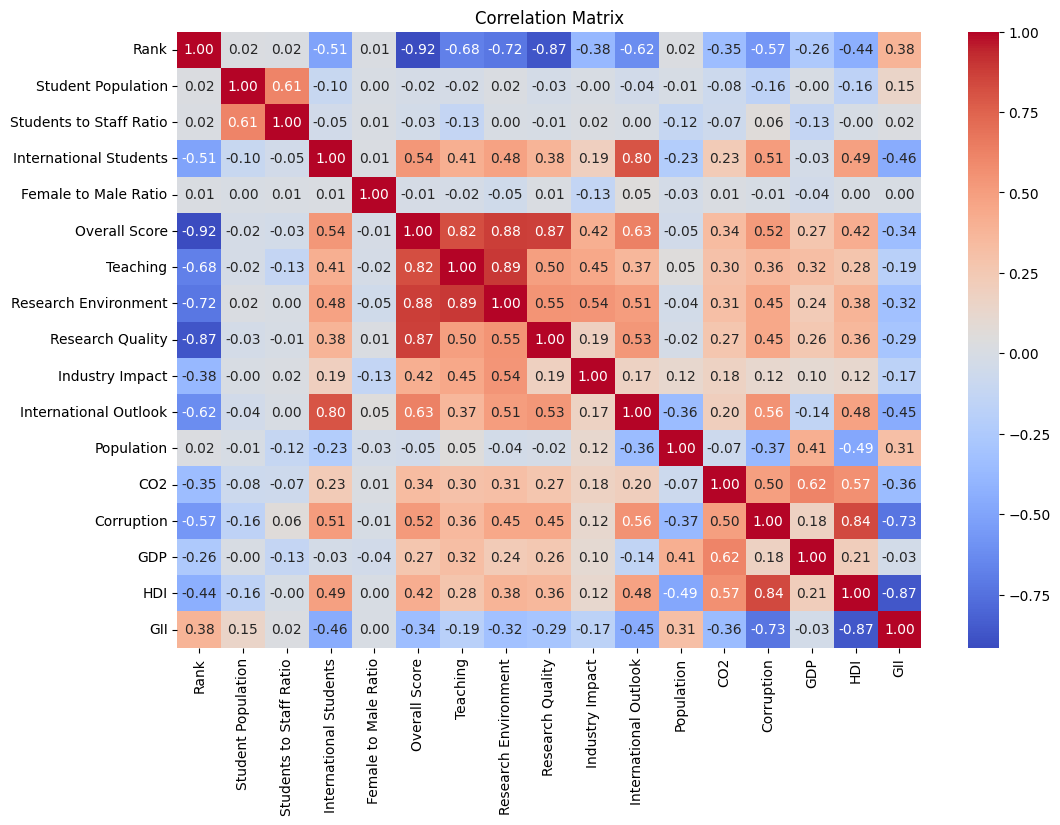

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

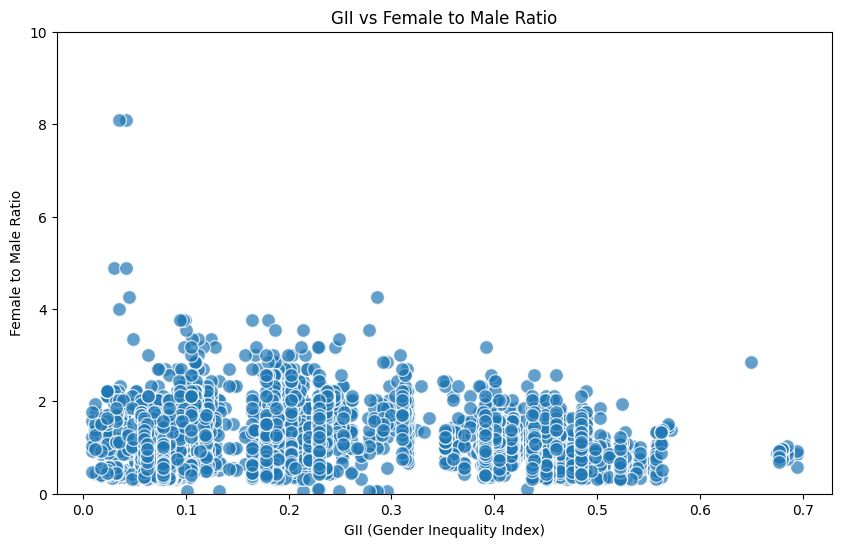

In [70]:
import matplotlib.pyplot as plt

# Plotting GII vs Female to Male Ratio
plt.figure(figsize=(10, 6))
plt.scatter(df['GII'], df['Female to Male Ratio'], alpha=0.7, edgecolors='w', s=100)

# Adding labels and title
plt.title('GII vs Female to Male Ratio')
plt.ylabel('Female to Male Ratio')
plt.xlabel('GII (Gender Inequality Index)')

# Limiting the y-axis between 0 and 10
plt.ylim(0, 10)

# Show the plot
plt.show()

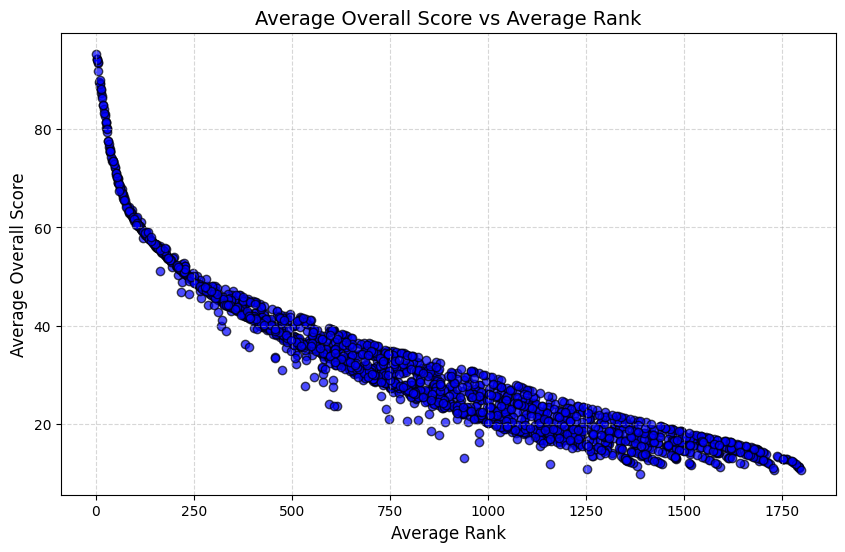

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

averages = df.groupby('Name').agg({
    'Overall Score': 'mean',
    'Rank': 'mean'
}).rename(columns={
    'Overall Score': 'Average Overall Score',
    'Rank': 'Average Rank'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(averages['Average Rank'], averages['Average Overall Score'], alpha=0.7, c='blue', edgecolors='black')
plt.title('Average Overall Score vs Average Rank', fontsize=14)
plt.xlabel('Average Rank', fontsize=12)
plt.ylabel('Average Overall Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [67]:
filtered_averages = averages[(averages['Average Rank'] < 1000) & (averages['Average Overall Score'] < 16)]
print(filtered_averages)
filtered_averages = averages[(averages['Average Rank'] < 680) & (averages['Average Overall Score'] < 25)]
filtered_averages

                              Name  Average Overall Score  Average Rank
473  Islamic Azad University Karaj                13.0875         939.0


,Name,Average Overall Score,Average Rank
619,Lille 1 University – Science and Technology,23.6175,615.0
868,Paris Dauphine University,24.1425,594.0
1618,University of Paris North – Paris 13,23.7700,609.0


In [59]:
def categorize_rank(rank):
    if rank <= 100:
        return 'Top 100'
    elif rank <= 300:
        return '101-300'
    else:
        return '301+'

df_grouped['Rank Group'] = df_grouped['Rank'].apply(categorize_rank)
print(df_grouped[['Name', 'Rank', 'Rank Group']].head())

                            Name      Rank Rank Group
0       AGH University of Krakow  1022.750       301+
1             Aalborg University   227.375    101-300
2               Aalto University   216.625    101-300
3              Aarhus University   110.375    101-300
4  Abdelmalek Essaâdi University  1471.000       301+


Index(['Rank', 'Student Population', 'Students to Staff Ratio',
       'International Students', 'Female to Male Ratio', 'Overall Score',
       'Teaching', 'Research Environment', 'Research Quality',
       'Industry Impact', 'International Outlook', 'Population', 'CO2',
       'Corruption', 'GDP', 'HDI', 'GII', 'Rank Group'],
      dtype='object')


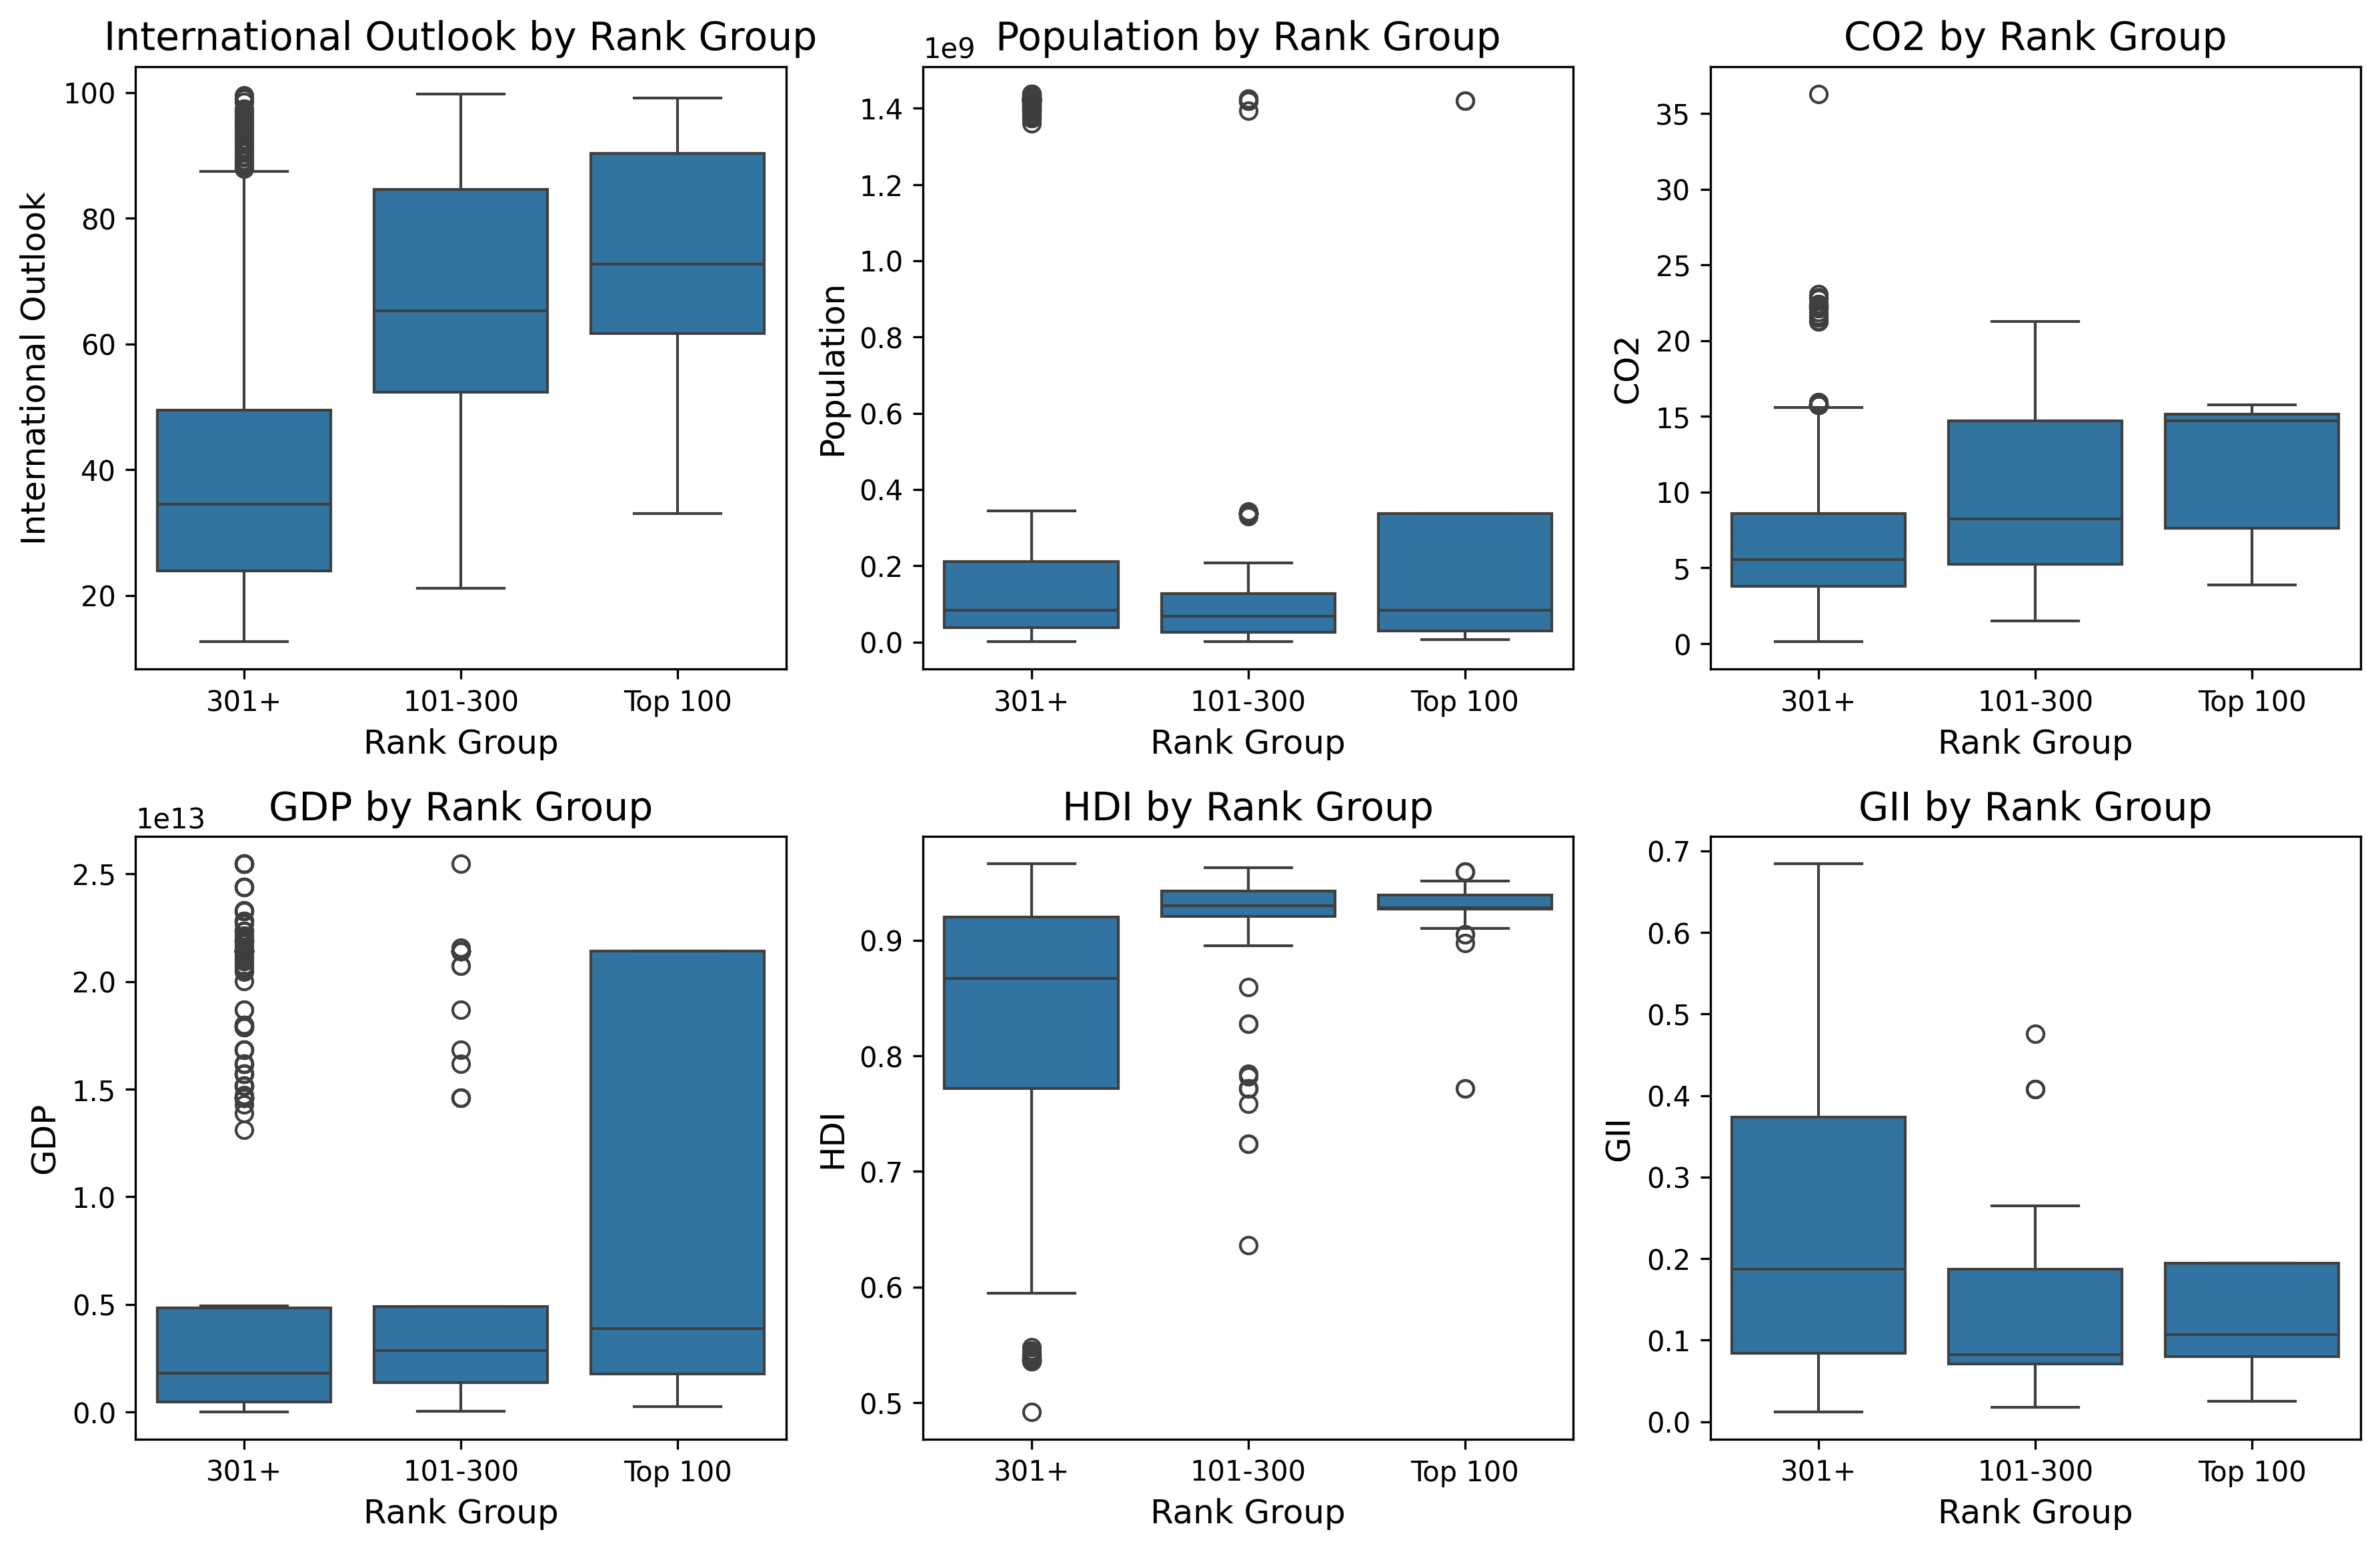

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop the 'Name' and 'Country' columns
df_grouped_cleaned = df_grouped.drop(columns=['Name'])
print(df_grouped_cleaned.columns)
# Step 2: Set up the plot with high quality (higher DPI)
plt.figure(figsize=(12, 8), dpi=300)  # High-resolution figure

# Create a list of variables to analyze
variables = ['International Outlook','Population', 'CO2', 'GDP', 'HDI', 'GII']

# Loop through each variable and create a boxplot
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_grouped_cleaned, x='Rank Group', y=var)
    plt.title(f'{var} by Rank Group', fontsize=14)
    plt.xlabel('Rank Group', fontsize=12)
    plt.ylabel(var, fontsize=12)

# Step 3: Adjust layout for better spacing
plt.tight_layout()

# Step 4: Save the figure as a high-resolution image
plt.savefig('rank_groups_comparison.png', dpi=300)  # Save as PNG with 300 DPI

# Show the plot
plt.show()